In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from lmfit import Model

from scipy.stats import linregress
from contact_resistance_v2 import idea

sns.set_theme(style = 'ticks', palette = 'deep')

Fit and plot Spacing vs Resistance per sample

In [ ]:
path_aut = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Contact Resistance\LSB_07\0G_21'
path_save = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Contact Resistance\LSB_07\Results'
sample = '0G_21'
files_aut = [os.path.join(path_aut, i) for i in os.listdir(path_aut)]

rt, tlm, val = idea.fit(files_aut, 80, sample)

fig, ax = plt.subplots(dpi = 50)
sns.scatterplot(data = tlm, x = 'Spacing ($\mu$m)', y = 'Resistance (M$\Omega$)', hue = 'Column', style = 'Column', s = 70)
sns.lineplot(data = tlm, x = 'Spacing ($\mu$m)', y = 'Fit', hue = 'Column')
ax.xaxis.set_major_formatter(lambda x, pos: '{:.1f}'.format(x * 1e4))
ax.yaxis.set_major_formatter(lambda x, pos: '{:.0f}'.format(x / 1e6))

tlm.to_csv(os.path.join(path_save, sample + '.txt'), sep = ';', index = False)
val.to_csv(os.path.join(path_save, 'val_' + sample + '.txt'), sep = ';', index = False)
display(tlm)
# # display(rt)
# val

Lets put the samples together

,Sheet resistance ($\Omega$/sq),Contact resistance ($\Omega$/sq),Conductivity (S/cm),Column,Sample
0,1.242402e+11,237299.116365,1.006116e-06,C4,0G_21
1,1.433348e+11,426339.309855,8.720839e-07,C1,0G_21
2,1.451453e+11,409004.980682,8.612062e-07,C2,0G_21
3,1.378785e+11,232324.126025,9.065952e-07,C3,0G_21
0,9.892960e+10,0.219470,1.263525e-06,C4,0G_22
1,3.119223e+10,878234.661052,4.007408e-06,C3,0G_22
0,1.127122e+11,113486.974119,1.109019e-06,C4,0G_23
1,9.777028e+10,495767.500175,1.278507e-06,C1,0G_23
2,1.051761e+11,320318.923387,1.188483e-06,C2,0G_23
3,1.053183e+11,397798.866280,1.186878e-06,C3,0G_23


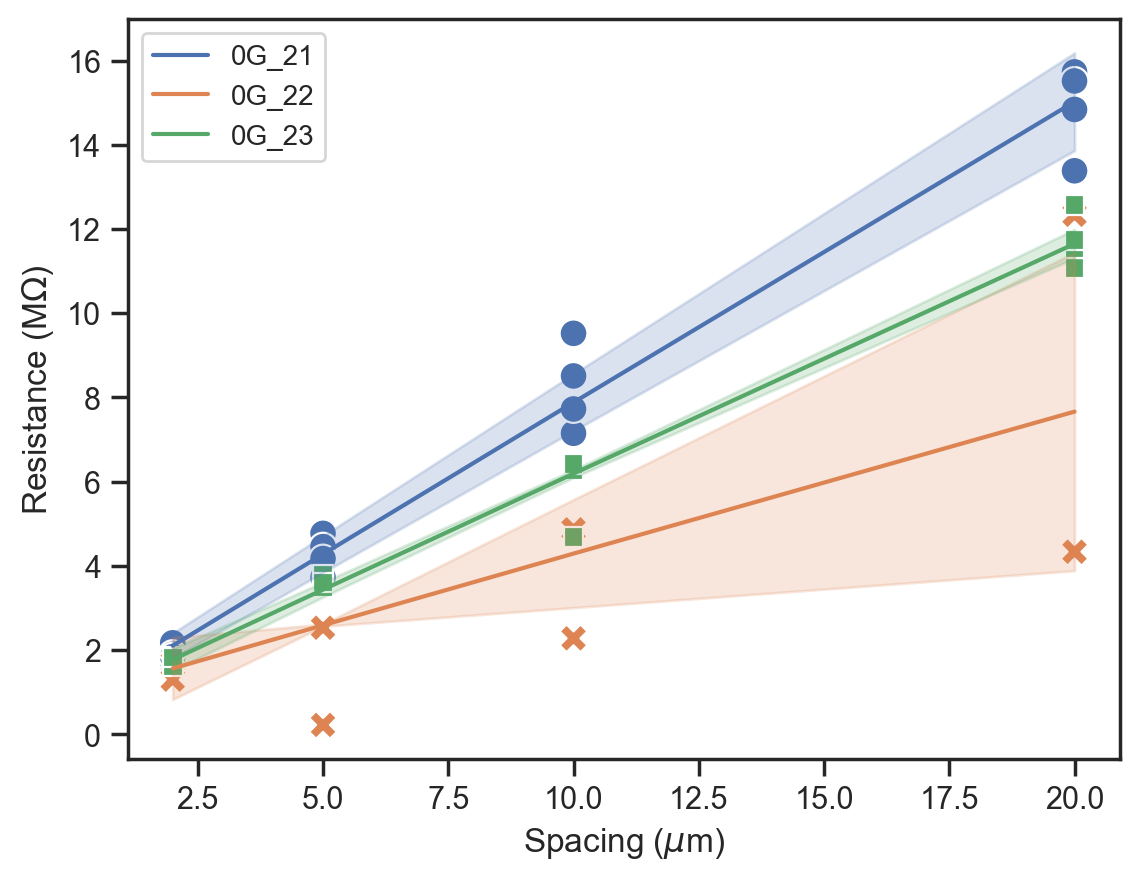

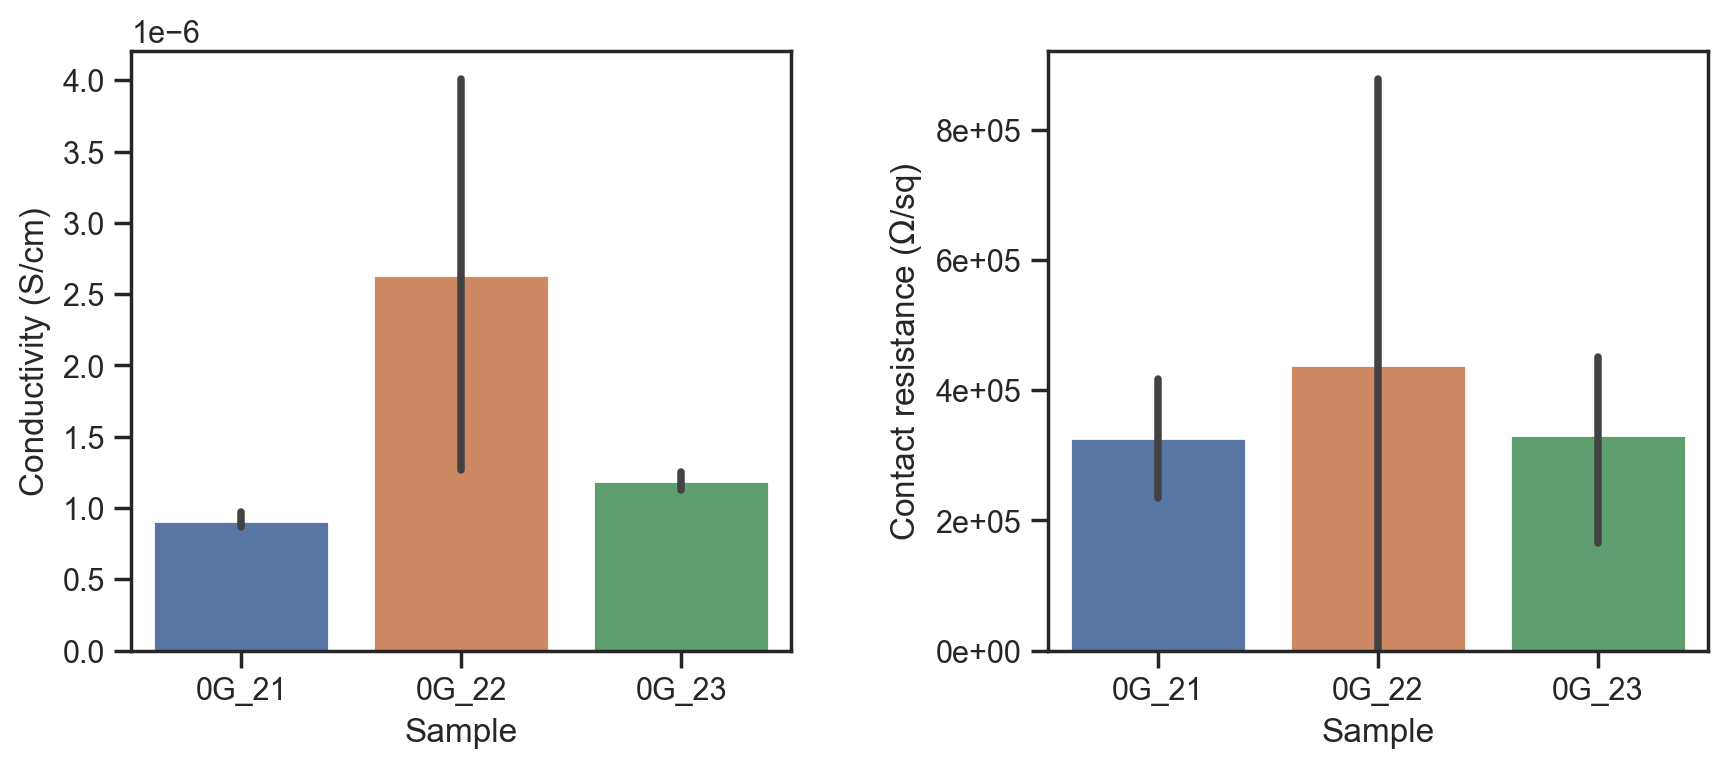

In [73]:
path_results = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Contact Resistance\LSB_07\Results_to_show'
files_r = [os.path.join(path_results, i) for i in os.listdir(path_results)]
col = [	'Spacing ($\mu$m)',	'Resistance (M$\Omega$)',	'Column',	'Fit',	'Sample'] # fix the scale since the label of resistance is in M
col_v = ['Sheet resistance ($\Omega$/sq)', 'Contact resistance ($\Omega$/sq)', 'Conductivity (S/cm)', 'Column', 'Sample' ]
df_values = pd.DataFrame()
df_results = pd.DataFrame()
for i in files_r:
    if 'val' in i:
        df_v = pd.read_csv(i, sep = ';')
        df_values = pd.concat([df_values, df_v])  
    else:
        df = pd.read_csv(i, sep = ';')
        df_results = pd.concat([df_results, df])
    
fig, ax = plt.subplots(dpi = 200)
sns.scatterplot(data = df_results, x = col[0], y = col[1], hue = col[4], style = col[4], legend = None, s = 100)
sns.lineplot(data = df_results, x = col[0], y = col[3], hue = 'Sample', errorbar = 'sd')   #, hue = col[4], style = col[4])
ax.legend(fontsize = 10)
ax.xaxis.set_major_formatter(lambda x, pos: '{:.1f}'.format(x * 1e4)) # fixed
ax.yaxis.set_major_formatter(lambda x, pos: '{:.0f}'.format(x / 1e6))

fig, ax = plt.subplots(dpi = 200, ncols=2, figsize = [10,5])
fig.tight_layout(pad = 5)
sns.barplot(data = df_values, x = 'Sample', y = col_v[2], ax = ax[0])
sns.barplot(data = df_values, x = 'Sample', y = col_v[1], ax = ax[1])
ax[1].yaxis.set_major_formatter(lambda x, pos: '{:.0e}'.format(x))
df_values